
Missing Values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wor

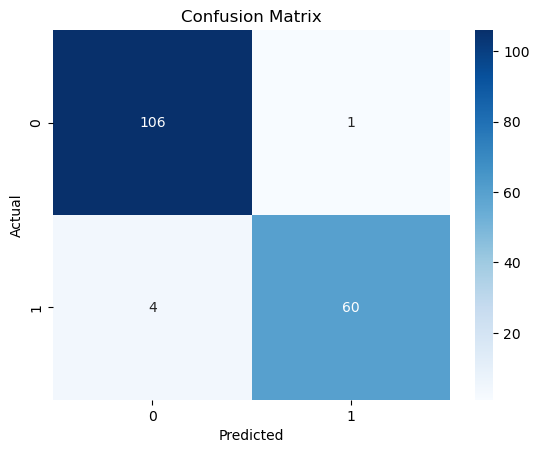


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



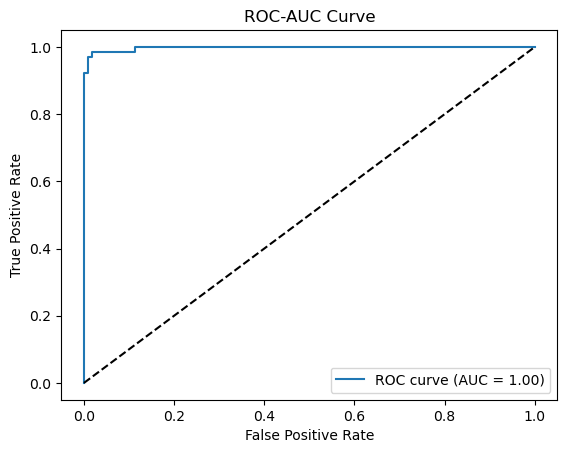


Performance at threshold 0.6:
Accuracy: 0.971
Precision: 1.000
Recall: 0.922


In [26]:
# logistic_regression_model.py

# 1️⃣ Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    recall_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# 2️⃣ Load dataset
data = pd.read_csv(r"D:\mydata\Elevate Labs\task4\data.csv", sep=',', encoding='utf-8')

# Basic dataset info
print("\nMissing Values:\n", data.isnull().sum())
print("\nData Info:")
print(data.info())
print("\nDataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())

# 3️⃣ Drop unwanted columns and handle missing values
# Do NOT drop all rows blindly; only drop the NaN column
data = data.drop(['Unnamed: 32'], axis=1, errors='ignore')

# Define features and labels
X = data.drop(['id', 'diagnosis'], axis=1, errors='ignore')
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Encode malignant as 1, benign as 0

# Confirm shapes
print("\nX shape:", X.shape)
print("y shape:", y.shape)
print("\nValue Counts:\n", y.value_counts())

# Verify no missing values
print("\nAny NaN in X?", X.isna().sum().sum() > 0)
print("Any NaN in y?", y.isna().sum() > 0)

# 4️⃣ Split the data safely
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y   # stratify preserves class balance
)

print("\nTrain size:", X_train.shape, "Test size:", X_test.shape)

# 5️⃣ Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6️⃣ Train the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# 7️⃣ Model predictions
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# 8️⃣ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9️⃣ Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10️⃣ ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

# 11️⃣ Threshold tuning example
threshold = 0.6
y_pred_custom = (y_pred_prob >= threshold).astype(int)
print(f"\nPerformance at threshold {threshold}:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.3f}")
print(f"Precision: {precision_score(y_test, y_pred_custom):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_custom):.3f}")
